In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import _pickle as pickle
np.random.seed(20201229)
tf.set_random_seed(20201229)

In [2]:
# --- ORENISTデータセットを読み込む ---
with open('ORENIST.data', 'rb') as file:
    images, labels = pickle.load(file, encoding='latin1')

In [3]:
x = tf.placeholder(tf.float32, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1]) # 画像の枚数×画像サイズ（縦×横）×レイヤー数の多次元リストでデータを与える, -1はデータ数に応じて調整するという意味

W_conv = tf.Variable(tf.truncated_normal([5,5,1,2], stddev=0.1))
h_conv = tf.abs(tf.nn.conv2d(x_image, W_conv, strides=[1,1,1,1], padding='SAME'))# 入力x_imageに対してフィルターW_convをかける, [1, dy, dx, 1]でdy, dxは縦横方向のピクセルの抽出数, SAMEはゼロパディング
h_conv_cutoff = tf.nn.relu(h_conv-0.2) # 0.2を引いてReluに代入することで，畳み込みフィルターで0.2以下になったところは強制的に0にする

h_pool =tf.nn.max_pool(h_conv_cutoff, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [4]:
h_pool_flat = tf.reshape(h_pool, [-1, 392])

num_units1 = 392
num_units2 = 2

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b2 = tf.Variable(tf.zeros([num_units2]))
hidden2 = tf.nn.tanh(tf.matmul(h_pool_flat, w2) + b2)

w0 = tf.Variable(tf.zeros([num_units2, 3]))
b0 = tf.Variable(tf.zeros([3]))
p = tf.nn.softmax(tf.matmul(hidden2, w0) + b0)

In [5]:
# --- 損失関数を定義 ---
t = tf.placeholder(tf.float32, [None, 3])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [6]:
# --- パラメータを最適化 ---
sess = tf.Session()
sess.run(tf.initialize_all_variables())
i = 0
for _ in range(1000):
    i += 1
    sess.run(train_step, feed_dict={x:images, t:labels})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:images, t:labels})
        print ('Step: %d, Loss: %f, Accuracy: %f' % (i, loss_val, acc_val))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Step: 100, Loss: 40.893730, Accuracy: 0.933333
Step: 200, Loss: 18.212982, Accuracy: 0.955556
Step: 300, Loss: 15.476323, Accuracy: 0.955556
Step: 400, Loss: 14.450534, Accuracy: 0.966667
Step: 500, Loss: 13.906462, Accuracy: 0.966667
Step: 600, Loss: 13.563348, Accuracy: 0.966667
Step: 700, Loss: 13.324292, Accuracy: 0.966667
Step: 800, Loss: 13.146881, Accuracy: 0.966667
Step: 900, Loss: 13.009436, Accuracy: 0.966667
Step: 1000, Loss: 12.899551, Accuracy: 0.966667


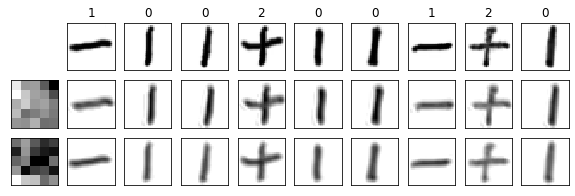

In [7]:
# --- 最初の9個のデータについて畳み込みフィルターの学習と最終的な分類を可視化する ---
filter_vals, conv_vals, pool_vals = sess.run([W_conv, h_conv_cutoff, h_pool], feed_dict={x:images[:9]})
fig = plt.figure(figsize=(10,3))

for i in range(2):
    subplot = fig.add_subplot(3, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i], cmap=plt.cm.gray_r, interpolation='nearest')

v_max = np.max(conv_vals) # ピクセル値の最大値

for i in range(9):
    subplot = fig.add_subplot(3, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(images[i].reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3, 10, 10+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_vals[i,:,:,0], vmin=0, vmax=v_max, cmap=plt.cm.gray_r, interpolation='nearest') # 0番目のフィルター
    
    subplot = fig.add_subplot(3, 10, 20+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_vals[i,:,:,1], vmin=0, vmax=v_max, cmap=plt.cm.gray_r, interpolation='nearest') # 1番目のフィルター

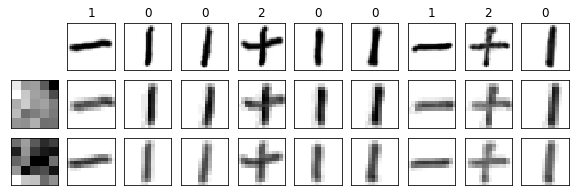

In [8]:
fig = plt.figure(figsize=(10,3))

v_max = np.max(pool_vals)

for i in range(2):
    subplot = fig.add_subplot(3, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i], cmap=plt.cm.gray_r, interpolation='nearest')

for i in range(9):
    subplot = fig.add_subplot(3, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(images[i].reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3, 10, 10+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(pool_vals[i,:,:,0], vmin=0, vmax=v_max, cmap=plt.cm.gray_r, interpolation='nearest') # 0番目のプーリング
    
    subplot = fig.add_subplot(3, 10, 20+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(pool_vals[i,:,:,1], vmin=0, vmax=v_max, cmap=plt.cm.gray_r, interpolation='nearest') # 1番目のプーリング

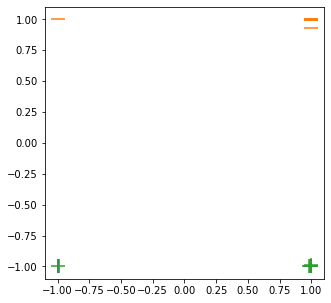

In [9]:
hidden2_vals = sess.run(hidden2, feed_dict={x:images})

z1_vals = [[],[],[]]
z2_vals = [[],[],[]]

for hidden2_val, label in zip(hidden2_vals, labels):
    label_num = np.argmax(label)
    z1_vals[label_num].append(hidden2_val[0])
    z2_vals[label_num].append(hidden2_val[1])
    
fig = plt.figure(figsize=(5,5))
subplot = fig.add_subplot(1,1,1)
subplot.scatter(z1_vals[0], z2_vals[0], s=200, marker='|')
subplot.scatter(z1_vals[1], z2_vals[1], s=200, marker='_')
subplot.scatter(z1_vals[2], z2_vals[2], s=200, marker='+')